In [60]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
from scipy.optimize import curve_fit, minimize
import json
import os
from scipy.optimize import minimize

import json

%pylab inline

Populating the interactive namespace from numpy and matplotlib


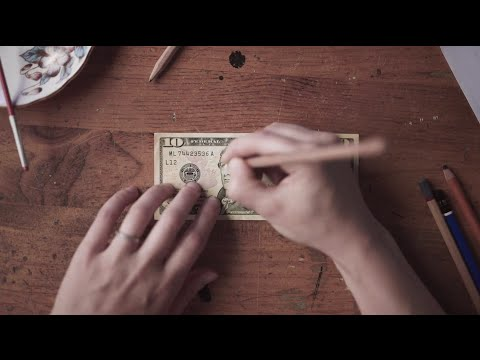

In [61]:
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

In [69]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [152]:
allmales = {'all':None, 'White':None, 'Black':None, 'Asian':None, 'Hispanic':None}
allfemales = {'all':None, 'White':None, 'Black':None, 'Asian':None, 'Hispanic':None}

#Creating dictionaries for male/female race and ethnicity

In [153]:
type(allmales) #testing

dict

In [154]:
allmales['all'] = pd.read_excel( url + 'pinc08_2_1_1.xls', header=9)
allmales['White'] = pd.read_excel( url + 'pinc08_2_1_4.xls', header=9)
allmales['Black'] = pd.read_excel( url + 'pinc08_2_1_6.xls', header=9)
allmales['Asian'] = pd.read_excel( url + 'pinc08_2_1_8.xls', header=9)
allmales['Hispanic'] = pd.read_excel( url + 'pinc08_2_1_9.xls', header=9)

allfemales['all'] = pd.read_excel( url + 'pinc08_3_1_1.xls', header=9)
allfemales['White'] = pd.read_excel( url + 'pinc08_3_1_4.xls', header=9)
allfemales['Black'] = pd.read_excel( url + 'pinc08_3_1_6.xls', header=9)
allfemales['Asian'] = pd.read_excel( url + 'pinc08_3_1_8.xls', header=9)
allfemales['Hispanic'] = pd.read_excel( url + 'pinc08_3_1_9.xls', header=9)

#Setting the dictionary keys to the values (excel docs from url)
#header=9 due to the source excel doc having 9 rows of 'header' above the column titles


In [155]:
allmales['all'].head() #testing the import

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706.0,4407.0,2665.0,3200.0,4027.0,4418.0,3333.0,5027.0,3807.0,...,513.0,626.0,457.0,12003.0,35228,211,50779,447,0.501,0.0033
2,Earnings,83555.0,3217.0,2326.0,2560.0,1964.0,3118.0,1505.0,3451.0,1959.0,...,246.0,559.0,259.0,10113.0,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263.0,2779.0,2184.0,2419.0,1780.0,2777.0,1365.0,3149.0,1847.0,...,244.0,540.0,257.0,9392.0,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014.0,1478.0,280.0,342.0,231.0,556.0,144.0,377.0,122.0,...,0.0,18.0,0.0,516.0,19557,1391,34247,1291,0.63,0.0092


In [156]:
allfemales['all'].columns #testing

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

### Descriptive Phase

In [103]:
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### Hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

# 2. Exploratory Phase

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff696f7f310>,
        ...,
        ...,
        ...,
       ..., 
        ...,
        ...,
        ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff627a50410>]], dtype=object)

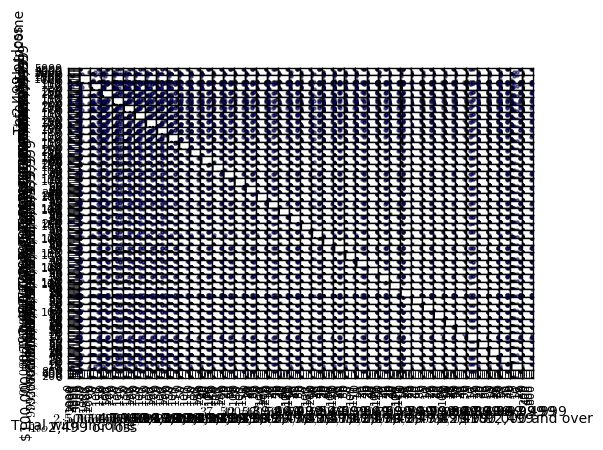

In [157]:
pd.scatter_matrix(allmales['Asian']) #test for fail - produces jumbled scatterplot

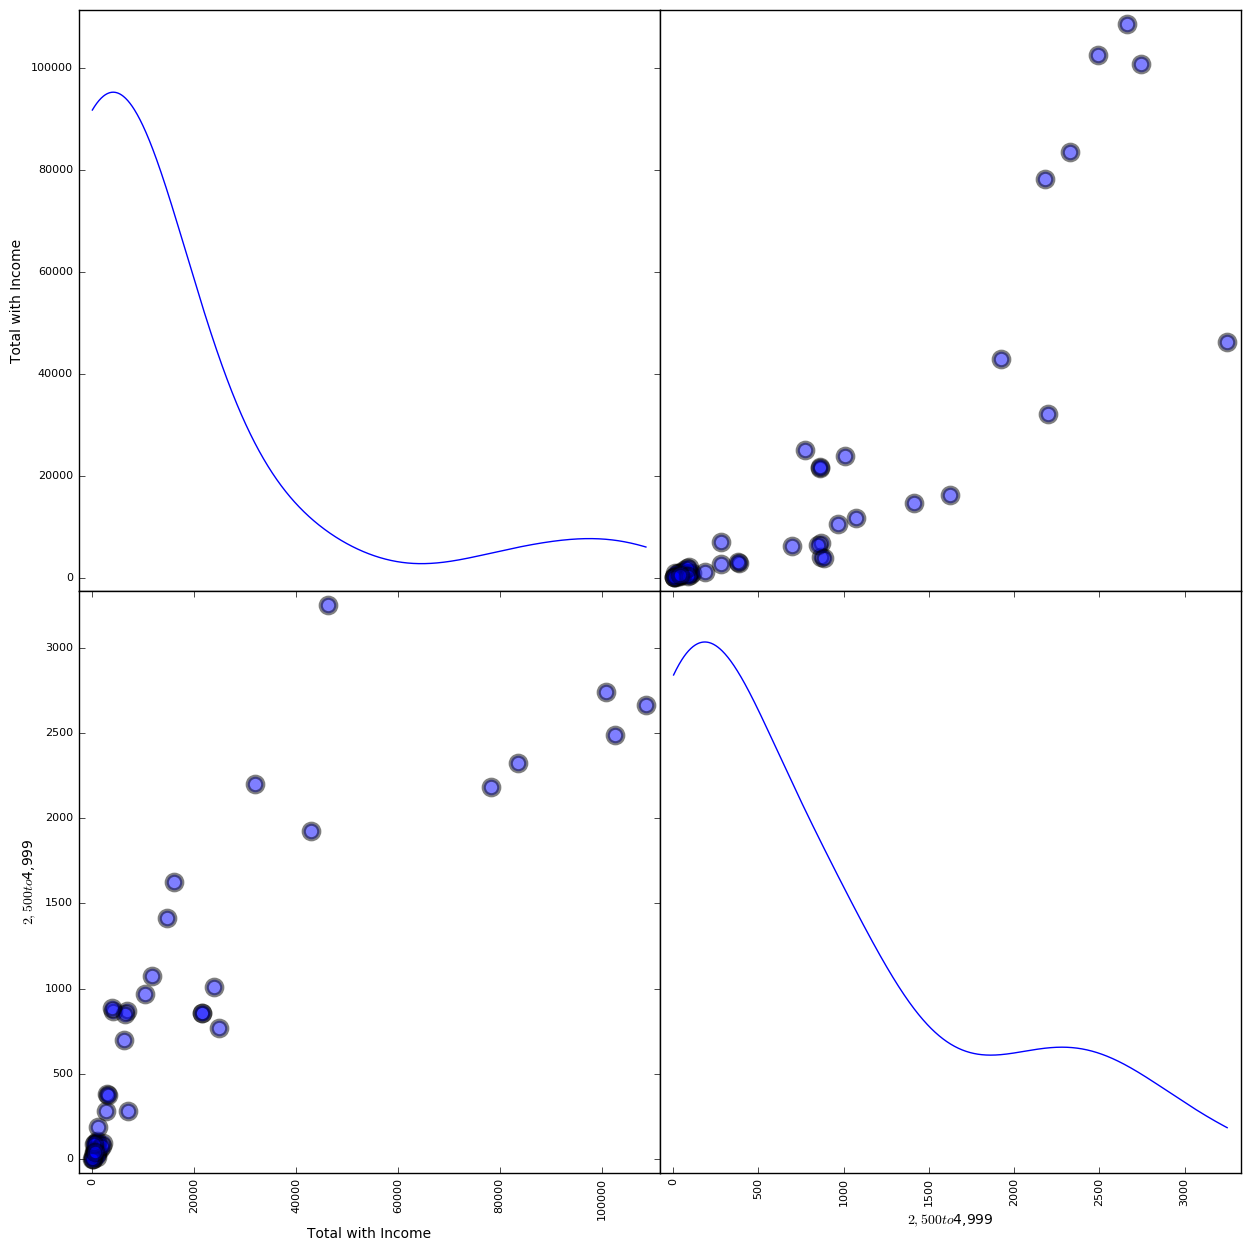

In [105]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                


In [107]:
print (allmales['Asian'].shape)
allmales['Asian'].applymap(np.isreal).sum() 

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [171]:
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                
#bringing in this code from the skeleton

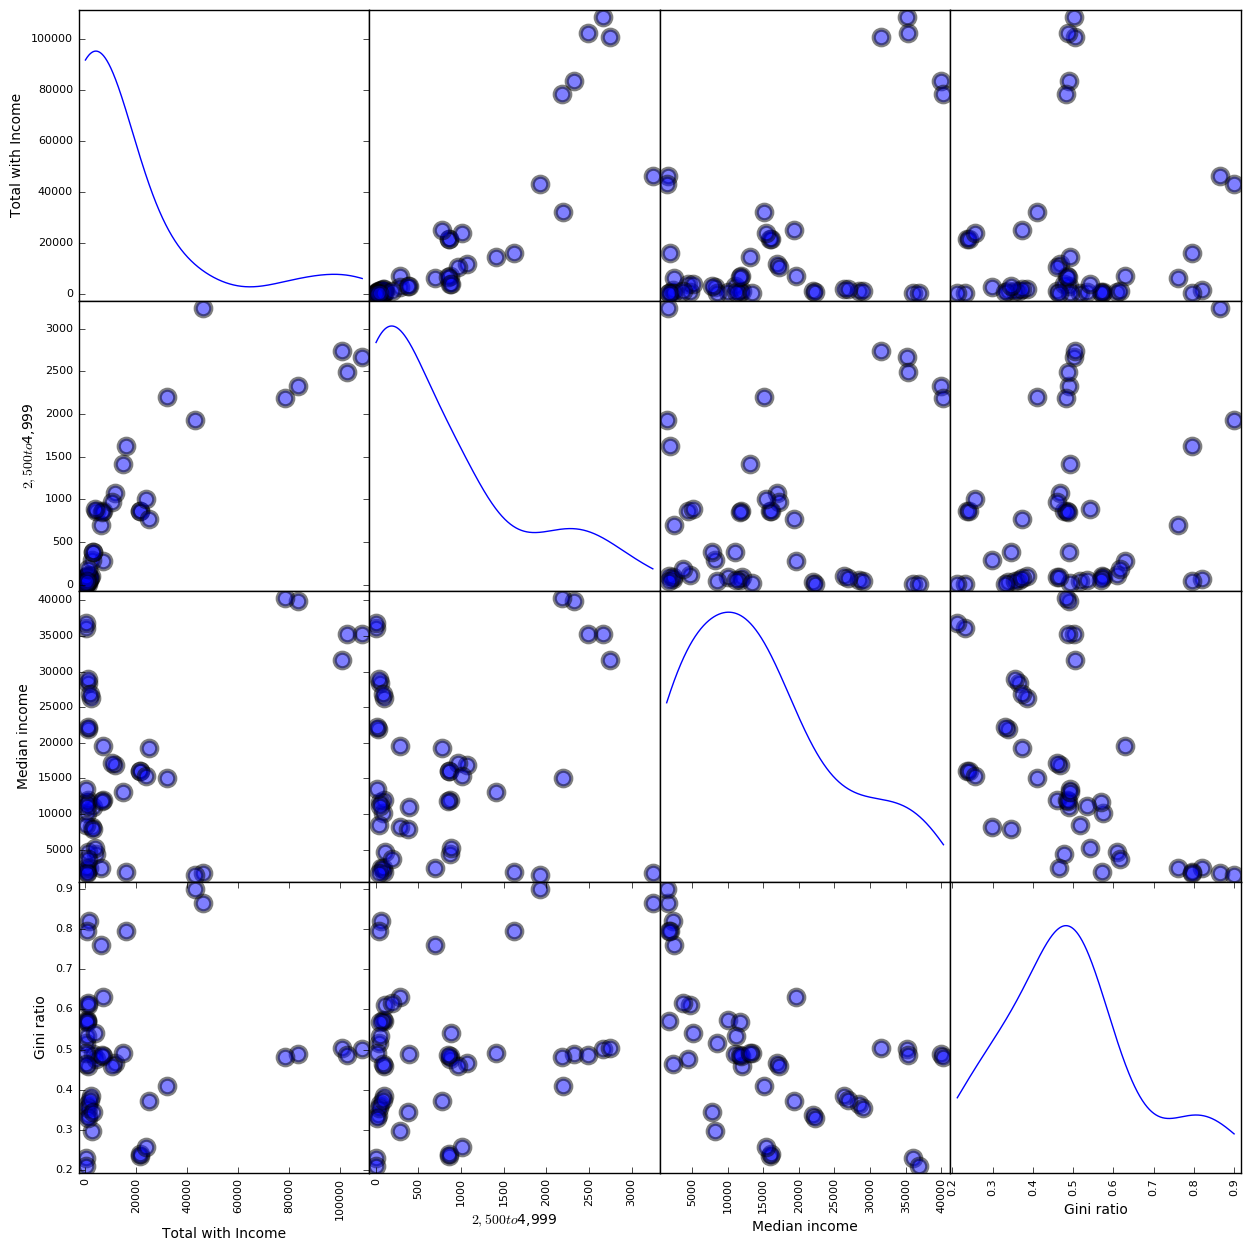

In [111]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')              

^ For all males in the sample population, the above plot displays four categories: Total with Income, $2500 - $4999, Median Income and Gini Ratio

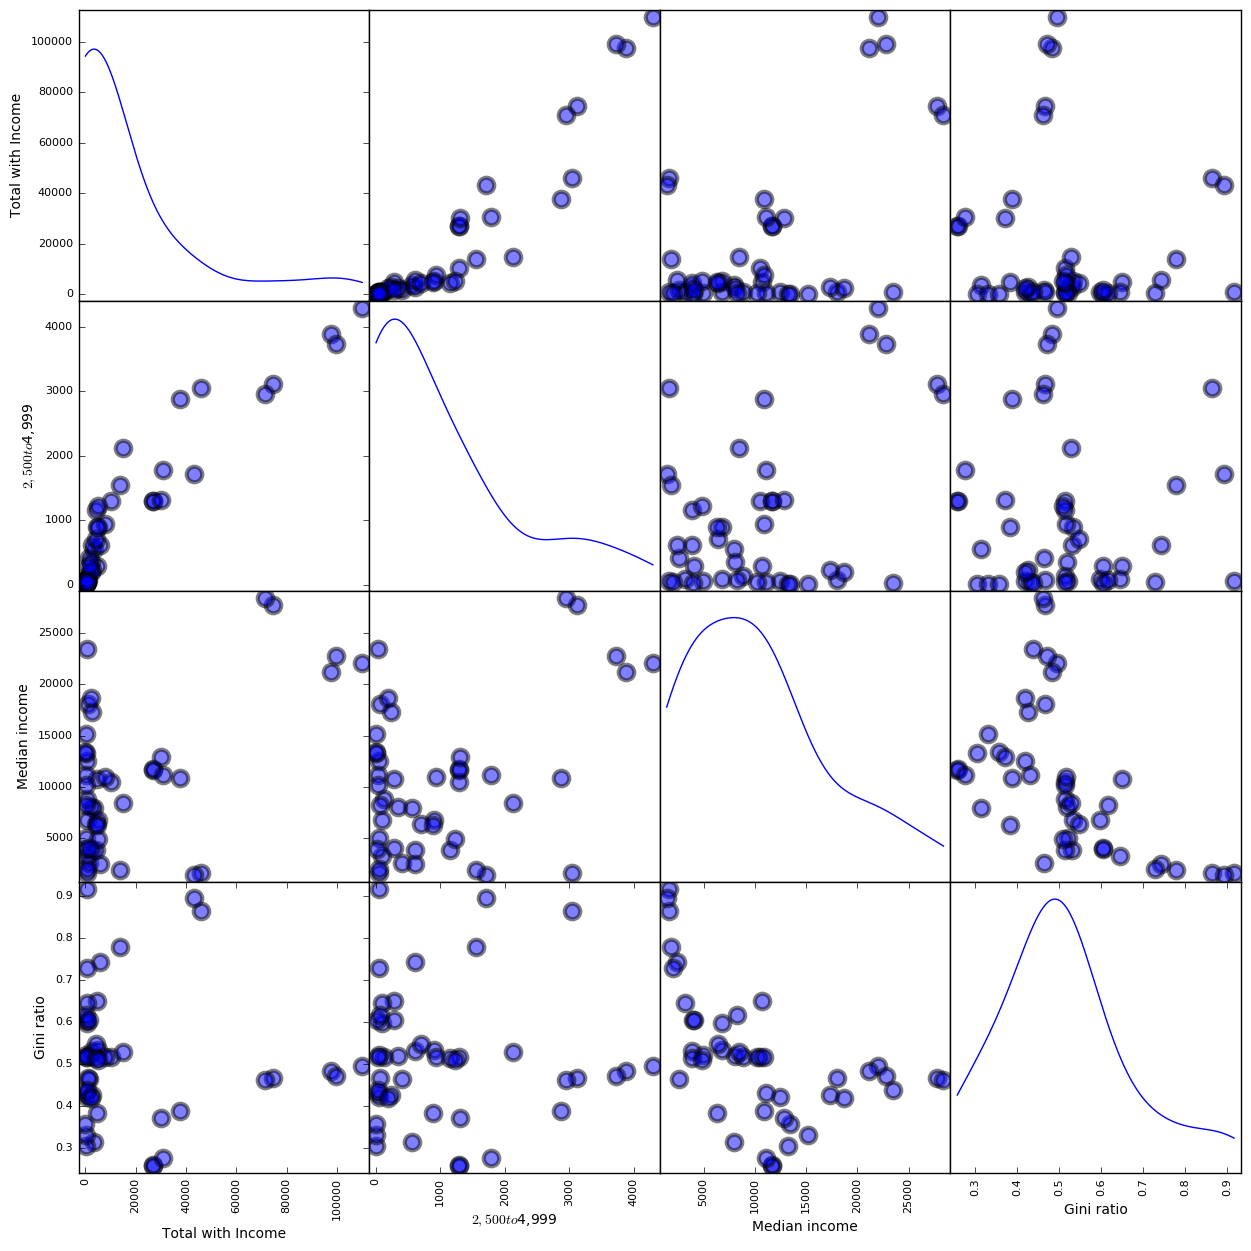

In [112]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

^ For all males in the sample population, the above plot displays four categories: Total with Income, $2500 - $4999, Median Income and Gini Ratio

# 3. Plot Total Median Income

In [133]:
income = pd.DataFrame(columns=['males','females'], index=['all','White','Black','Asian', 'Hispanic'])

^ creating a dataframe from the dictionaries created above

In [139]:
print (income.head())

          males females
all       35228   22063
White     40122   23780
Black     24855   20044
Asian     40153   24840
Hispanic  25411   17762


In [134]:
for k in allfemales:
    income["males"][k] = allmales[k]["Median income"][1]
    income["females"][k] = allfemales[k]["Median income"][1]

In [140]:
males = np.array(list(income["males"]))
females = np.array(list(income["females"]))

In [141]:
def linear(x):
    return x

In [117]:
params = np.polyfit(males, females, 1)

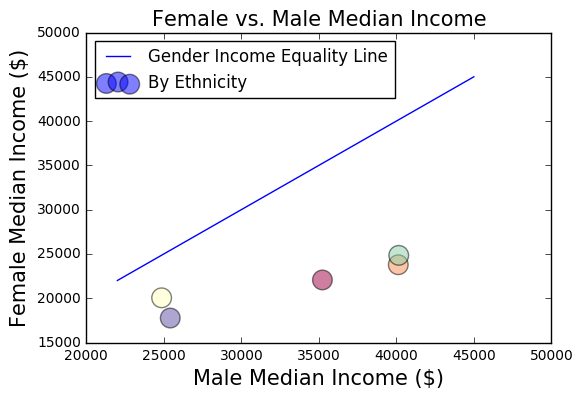

In [158]:
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,
          cmap = plt.get_cmap('Spectral'), label='By Ethnicity')
x=np.arange(22000,45000)
pl.plot(x,linear(x), label='Gender Income Equality Line')
pl.xlabel("Male Median Income ($)", fontsize=15)
pl.ylabel("Female Median Income ($)", fontsize=15)
pl.title("Female vs. Male Median Income", fontsize=15)

pl.legend(loc='best')

# 4. Fit Data With a Line

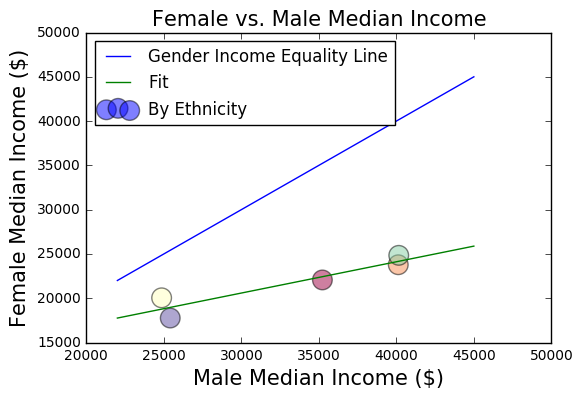

In [142]:
def fit(x, a, b):
    return a+b*x

pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='By Ethnicity') 
x=np.arange(22000,45000)
pl.plot(x,linear(x), label='Gender Income Equality Line')
pl.plot(x,fit(x,params[1],params[0]), label='Fit')
pl.xlabel("Male Median Income ($)", fontsize=15)
pl.ylabel("Female Median Income ($)", fontsize=15)
pl.title("Female vs. Male Median Income", fontsize=15)
pl.legend(loc='best')

^ This plot includes the FIT line through the data points for Income by Ethnicity

In [148]:
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['White']['Median income'][1],
                    allmales['Black']['Median income'][1],
                     allmales['Hispanic']['Median income'][1],
                    allmales['Asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'White', 'Black',
                                     'Hispanic','Asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

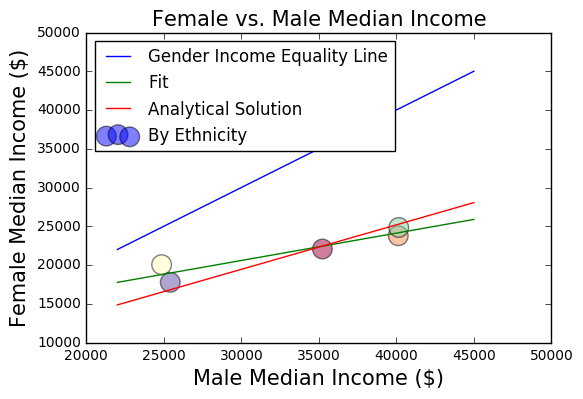

In [149]:
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='By Ethnicity') 
x=np.arange(22000,45000)
pl.plot(x,linear(x), label='Gender Income Equality Line')
pl.plot(x,fit(x,params[1],params[0]), label='Fit')
pl.plot(x,fit(x,beta0,beta1), label='Analytical Solution')
pl.xlabel("Male Median Income ($)", fontsize=15)
pl.ylabel("Female Median Income ($)", fontsize=15)
pl.title("Female vs. Male Median Income", fontsize=15)
pl.legend(loc='best')

^ This plot includes an Analytical Solution line which demonstrates a potential egalitarian representation of pay by gender.

In [150]:
income

,males,females
all,35228,22063
White,40122,23780
Black,24855,20044
Asian,40153,24840
Hispanic,25411,17762


# 5. Other forms of Incomes

In [172]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['White']['Median income'][:].values,
                    allmales['Black']['Median income'][:].values,
                    allmales['Hispanic']['Median income'][:].values,
                    allmales['Asian']['Median income'][:].values]).flatten())

all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'White', 'Black', 
                                    'Hispanic', 'Asian']]).flatten())


mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))

#Bringing in code from skeleton notebook


In [173]:
params_all = np.polyfit(all_males_allincomes[mask], all_females_allincomes[mask],1)
cor = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1_all = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0_all = all_females_allincomes[mask].mean() - beta1 * all_males_allincomes[mask].mean()
beta0_all, beta1_all

(2017.5716833944698, 0.62234483903975324)

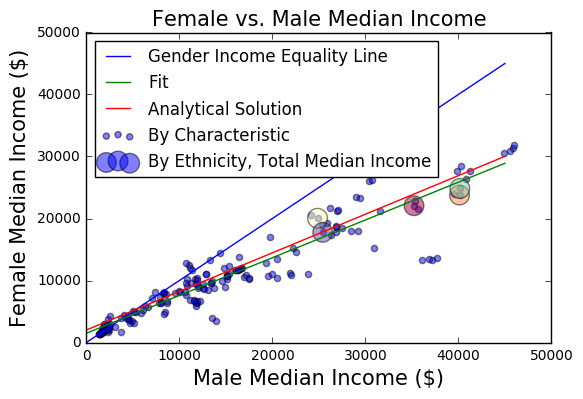

In [178]:
pl.scatter(all_males_allincomes[mask], all_females_allincomes[mask], s=20, alpha=0.5,
           cmap = plt.get_cmap('Spectral'), label='By Characteristic')
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,
          cmap = plt.get_cmap('Spectral'), label='By Ethnicity, Total Median Income')
x=np.arange(0,45000)
pl.plot(x,linear(x), label='Gender Income Equality Line')
pl.plot(x,fit(x,params_all[1],params_all[0]), label='Fit')
pl.plot(x,fit(x,beta0_all,beta1_all), label='Analytical Solution')
pl.xlabel("Male Median Income ($)", fontsize=15)
pl.ylabel("Female Median Income ($)", fontsize=15)
pl.title("Female vs. Male Median Income", fontsize=15)
pl.xlim(left=0)
pl.ylim(bottom=0)
pl.legend(loc='best')